In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import RidgeClassifierCV

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [6]:
pd.set_option('max_columns', None)

In [7]:
df = pd.read_csv("../Rotman MMA Summer Datathon NWHL.csv")

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26882 entries, 0 to 26881
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   game_date          26882 non-null  object 
 1   Home Team          26882 non-null  object 
 2   Away Team          26882 non-null  object 
 3   Period             26882 non-null  int64  
 4   Clock              26882 non-null  object 
 5   Home Team Skaters  26882 non-null  int64  
 6   Away Team Skaters  26882 non-null  int64  
 7   Home Team Goals    26882 non-null  int64  
 8   Away Team Goals    26882 non-null  int64  
 9   Team               26882 non-null  object 
 10  Player             26882 non-null  object 
 11  Event              26882 non-null  object 
 12  X Coordinate       26882 non-null  int64  
 13  Y Coordinate       26882 non-null  int64  
 14  Detail 1           17461 non-null  object 
 15  Detail 2           1985 non-null   object 
 16  Detail 3           198

In [8]:
print(df.head())

    game_date            Home Team     Away Team  Period  Clock  \
0  2021-01-23  Minnesota Whitecaps  Boston Pride       1  20:00   
1  2021-01-23  Minnesota Whitecaps  Boston Pride       1  19:58   
2  2021-01-23  Minnesota Whitecaps  Boston Pride       1  19:57   
3  2021-01-23  Minnesota Whitecaps  Boston Pride       1  19:55   
4  2021-01-23  Minnesota Whitecaps  Boston Pride       1  19:53   

   Home Team Skaters  Away Team Skaters  Home Team Goals  Away Team Goals  \
0                  5                  5                0                0   
1                  5                  5                0                0   
2                  5                  5                0                0   
3                  5                  5                0                0   
4                  5                  5                0                0   

           Team           Player          Event  X Coordinate  Y Coordinate  \
0  Boston Pride  Jillian Dempsey    Faceoff Win        

In [9]:
df['Detail 1'].unique()

array(['Backhand', nan, 'Carried', 'Snapshot', 'Indirect', 'Direct',
       'Lost', 'Played', 'Dumped', 'Wrap Around', 'Forehand', 'Retained',
       'Wristshot', 'Slapshot', 'Tripping', 'Roughing', 'Fan', 'Hooking',
       'Interference', 'Deflection', 'Too many men on the ice',
       'Charging', 'Holding', 'Illegal Check to the Head',
       'Game Misconduct', 'Cross-checking', 'Slashing', 'High-sticking',
       'Feet', 'Elbowing', 'Unsportsmanlike conduct',
       'Face-off violation', 'Holding the stick',
       'Goalkeeper interference'], dtype=object)

In [10]:
# sample_df = df.iloc[0:100, :]
# sample_df.to_csv('sample hocky data.csv', index=False)

In [11]:
event_type_df = df.copy()
event_type_df['count'] = 1

event_type_df = df.groupby(['Event', 'Detail 1']).size().copy()
print(event_type_df)


Event            Detail 1                 
Dump In/Out      Lost                         1637
                 Retained                      226
Faceoff Win      Backhand                      618
                 Feet                            1
                 Forehand                      227
Goal             Deflection                      6
                 Fan                             1
                 Slapshot                        3
                 Snapshot                       44
                 Wrap Around                     2
                 Wristshot                      20
Incomplete Play  Direct                       2011
                 Indirect                     1419
Penalty Taken    Charging                        1
                 Cross-checking                  7
                 Elbowing                        1
                 Face-off violation              1
                 Game Misconduct                 2
                 Goalkeeper interferenc

In [12]:
goals_df = df.loc[(df['Event'] == 'Goal')].copy()


goals_df_clean = goals_df[['Player', 'X Coordinate', 'Y Coordinate', 'Detail 1', 'Detail 2', 'Detail 3', 'Detail 4', 'Home Team Goals', 'Away Team Goals']]
print(goals_df_clean.head())
print(goals_df_clean.info())

                 Player  X Coordinate  Y Coordinate   Detail 1 Detail 2  \
387   Christina Putigna           175            44   Snapshot   On Net   
423        Jonna Curtis           180            39   Snapshot   On Net   
879   Winny Brodt-Brown           188            55   Snapshot   On Net   
2382      Kayla Friesen           144            15   Snapshot   On Net   
3052    Kristin Lewicki           168            28  Wristshot   On Net   

     Detail 3 Detail 4  Home Team Goals  Away Team Goals  
387         f        f                0                0  
423         f        f                0                1  
879         t        f                1                1  
2382        t        f                0                0  
3052        t        f                0                1  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 387 to 26693
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  -----

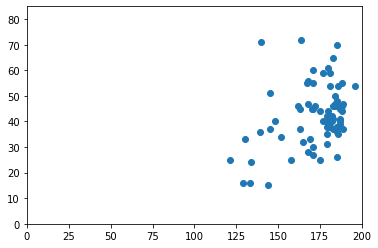

In [13]:
x = goals_df_clean['X Coordinate']
y = goals_df_clean['Y Coordinate']

plt.scatter(x, y)
plt.xlim(0, 200)
plt.ylim(0, 85)

plt.show()

In [14]:
import seaborn as sns

c:\Users\alvin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


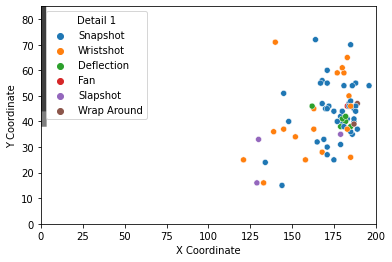

In [15]:
fig, ax = plt.subplots()
goal_plot = sns.scatterplot('X Coordinate', 'Y Coordinate', data=goals_df_clean, hue='Detail 1')

ax.set_xlim(0, 200)
ax.set_ylim(0, 85)

# plt.scatter(189, 42.5, marker='s', s=100)
goal_location = [189,189], [39.5, 45.5]

plt.plot(goal_location, linewidth=8, alpha = 0.5, color='k')

# plt.scatter(11, 42.5, marker='s', s=100)
plt.show()

In [16]:
# corr = goals_df.corr()

# fig, ax = plt.subplots()
# sns.heatmap(corr)

In [17]:
# sns.pairplot(goals_df)

In [18]:
goals_df_clean.to_csv('goals_df_clean.csv', index=True)

In [19]:
games_df = df.groupby(['game_date', 'Home Team', 'Away Team']).size().copy()
print(games_df)
print('number of games: ' + str(len(games_df.index)))
# games_df.to_csv('TEST games_df.csv', index=False)




game_date   Home Team              Away Team            
2021-01-23  Buffalo Beauts         Connecticut Whale        1997
            Metropolitan Riveters  Toronto Six              1719
            Minnesota Whitecaps    Boston Pride             1649
2021-01-24  Boston Pride           Buffalo Beauts           1798
            Connecticut Whale      Metropolitan Riveters    1870
            Toronto Six            Minnesota Whitecaps      1881
2021-01-26  Metropolitan Riveters  Minnesota Whitecaps      1817
            Toronto Six            Boston Pride             1730
2021-01-27  Buffalo Beauts         Toronto Six              1771
            Connecticut Whale      Boston Pride             1827
2021-01-30  Buffalo Beauts         Boston Pride             1793
            Toronto Six            Minnesota Whitecaps      1747
2021-01-31  Boston Pride           Buffalo Beauts           1766
            Toronto Six            Connecticut Whale        1772
2021-02-01  Buffalo Beauts       

In [20]:
# df['game_desc'] = df['Home Team'] + " vs " + df['Away Team']
# df.drop('game_desc', 1)
# df.head()

In [21]:
new_df = df.copy()

new_df['game_id'] = df.groupby(['game_date', 'Home Team', 'Away Team'], sort=False).ngroup()+1

first_column = new_df.pop('game_id')
new_df.insert(0, 'game_id', first_column)

# df.to_csv('TEST game id.csv', index=False)

In [22]:
columns = list(new_df.columns.values)
event_before_goal_df = pd.DataFrame(columns=columns)

# entry = pd.DataFrame()

entry = new_df.loc[7]
event_before_goal_df.loc[len(event_before_goal_df)] = entry
print(event_before_goal_df)

  game_id   game_date            Home Team     Away Team Period  Clock  \
0       1  2021-01-23  Minnesota Whitecaps  Boston Pride      1  19:48   

  Home Team Skaters Away Team Skaters Home Team Goals Away Team Goals  \
0                 5                 5               0               0   

                  Team              Player       Event X Coordinate  \
0  Minnesota Whitecaps  Stephanie Anderson  Zone Entry          125   

  Y Coordinate Detail 1 Detail 2 Detail 3 Detail 4         Player 2  \
0            6  Carried      NaN      NaN      NaN  Kaleigh Fratkin   

  X Coordinate 2 Y Coordinate 2  
0            NaN            NaN  


In [23]:
x = 0
i = 1
columns = list(new_df.columns.values)
event_before_goal_df = pd.DataFrame(columns=columns)





while i < len(new_df):
    if (new_df['Event'][i] == 'Goal'):
        entry = new_df.loc[i-1]
        event_before_goal_df.loc[len(event_before_goal_df)] = entry
        
    i += 1

        
# print(event_before_goal_df)        


In [24]:
# event_before_goal_df.to_csv('event_before_goal_df.csv', index=False)

In [25]:
# event_before_goal_df['Detail Summary'] = event_before_goal_df['Event'] + ' ' + event_before_goal_df['Detail 1']
# event_before_goal_df.head()

event_before_goal_df['Detail Summary'] = np.where(event_before_goal_df['Detail 1'].notnull(), event_before_goal_df['Event'] + ' ' + event_before_goal_df['Detail 1'], event_before_goal_df['Event'])
event_before_goal_df.head()


,game_id,game_date,Home Team,Away Team,Period,Clock,Home Team Skaters,Away Team Skaters,Home Team Goals,Away Team Goals,Team,Player,Event,X Coordinate,Y Coordinate,Detail 1,Detail 2,Detail 3,Detail 4,Player 2,X Coordinate 2,Y Coordinate 2,Detail Summary
0,1,2021-01-23,Minnesota Whitecaps,Boston Pride,1,6:42,5,5,0,0,Boston Pride,Christina Putigna,Puck Recovery,175,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Puck Recovery
1,1,2021-01-23,Minnesota Whitecaps,Boston Pride,1,5:40,5,5,0,1,Minnesota Whitecaps,Jonna Curtis,Puck Recovery,180,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Puck Recovery
2,1,2021-01-23,Minnesota Whitecaps,Boston Pride,2,8:02,5,5,1,1,Minnesota Whitecaps,Winny Brodt-Brown,Puck Recovery,188,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Puck Recovery
3,2,2021-01-23,Buffalo Beauts,Connecticut Whale,2,15:55,5,5,0,0,Connecticut Whale,Kayla Friesen,Zone Entry,124,15,Carried,NaN,NaN,NaN,Alyson Matteau,NaN,NaN,Zone Entry Carried
4,2,2021-01-23,Buffalo Beauts,Connecticut Whale,3,14:33,5,4,0,1,Buffalo Beauts,Alyson Matteau,Play,148,65,Direct,NaN,NaN,NaN,Kristin Lewicki,165.0,20.0,Play Direct


In [26]:
x = event_before_goal_df['Detail Summary']
# y = LabelBinarizer().fit_transform(x)
LB = LabelBinarizer()

y = pd.DataFrame(LB.fit_transform(event_before_goal_df['Detail Summary']), columns=LB.classes_)

event_before_goal_df = pd.concat([event_before_goal_df, y], axis=1)
event_before_goal_df['Goal Event'] = 1
event_before_goal_df.info()
# event_before_goal_df.to_csv('event_before_goal_df.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 0 to 75
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   game_id             76 non-null     object 
 1   game_date           76 non-null     object 
 2   Home Team           76 non-null     object 
 3   Away Team           76 non-null     object 
 4   Period              76 non-null     object 
 5   Clock               76 non-null     object 
 6   Home Team Skaters   76 non-null     object 
 7   Away Team Skaters   76 non-null     object 
 8   Home Team Goals     76 non-null     object 
 9   Away Team Goals     76 non-null     object 
 10  Team                76 non-null     object 
 11  Player              76 non-null     object 
 12  Event               76 non-null     object 
 13  X Coordinate        76 non-null     object 
 14  Y Coordinate        76 non-null     object 
 15  Detail 1            47 non-null     object 
 16  Detail 2  

In [27]:
x = event_before_goal_df.iloc[:, 23:78]
goals = [1]*76
y = pd.DataFrame({'Goals':goals})
print(x)

    Play Direct  Play Indirect  Puck Recovery  Shot Deflection  Shot Slapshot  \
0             0              0              1                0              0   
1             0              0              1                0              0   
2             0              0              1                0              0   
3             0              0              0                0              0   
4             1              0              0                0              0   
..          ...            ...            ...              ...            ...   
71            0              0              0                0              0   
72            0              0              0                0              0   
73            0              0              0                0              0   
74            1              0              0                0              0   
75            0              0              1                0              0   

    Shot Snapshot  Takeaway

In [28]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [29]:
# LR = LogisticRegression()
# LR.fit(x_train, y_train)

# y_prediction = LR.predict(x_test)
# y_prediction

In [30]:
score=r2_score(y_test,y_prediction)
print('r2 score is ',score)
print('mean_sqrd_error is==',mean_squared_error(y_test,y_prediction))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_prediction)))

NameError: name 'y_test' is not defined

### Try Logistic Regression Again with full dataset

In [ ]:
new_df['Goal Target'] = 0

i=0

while i < len(new_df):
    if (new_df['Event'][i] == 'Goal'):

        new_df.at[i-1, 'Goal Target'] = 1


    i += 1

new_df['Goal Target'].sum()


76

In [ ]:
new_df = df.copy()

new_df['game_id'] = df.groupby(['game_date', 'Home Team', 'Away Team'], sort=False).ngroup()+1

first_column = new_df.pop('game_id')
new_df.insert(0, 'game_id', first_column)

new_df['Detail Summary'] = np.where(new_df['Detail 1'].notnull(), new_df['Event'] + ' ' + new_df['Detail 1'], new_df['Event'])

new_df['Goal Target'] = 0

# i=0

# while i < len(new_df):
#     if (new_df['Event'][i] == 'Goal'):

#         new_df.at[i-1, 'Goal Target'] = 1


#     i += 1

# new_df['Goal Target'].sum()

# LB = LabelBinarizer()

# labels = pd.DataFrame(LB.fit_transform(new_df['Detail Summary']), columns=LB.classes_)
# new_df = pd.concat([new_df, labels], axis=1)

# new_df.to_csv('new_df.csv', index=False)
# print(new_df)

In [ ]:
# y = new_df.iloc[:, 23]
# x = new_df.iloc[:, 23:67]
# print(y)

In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
# LR = LogisticRegression()
# LR.fit(x_train, y_train)

# y_prediction = LR.predict(x_test)
# print(str(y_prediction))
# y_prediction_df = pd.DataFrame(y_prediction)
# # y_prediction_df.to_csv('y_prediction_df.csv')

# confusion_matrix = confusion_matrix(y_test, y_prediction)
# print(confusion_matrix)

In [ ]:
# print(LR.coef_)

In [ ]:
# score=r2_score(y_test,y_prediction)
# print('r2 score is ',score)
# print('mean_sqrd_error is =',mean_squared_error(y_test,y_prediction))
# print('root_mean_squared error of is =',np.sqrt(mean_squared_error(y_test,y_prediction)))

In [ ]:
TEST_new_df = df.copy()

TEST_new_df['game_id'] = df.groupby(['game_date', 'Home Team', 'Away Team'], sort=False).ngroup()+1

first_column = TEST_new_df.pop('game_id')
TEST_new_df.insert(0, 'game_id', first_column)

TEST_new_df['Goal Target'] = 0

i=0
j=0

while i < len(TEST_new_df):
    if (TEST_new_df['Event'][i] == 'Goal'):

        TEST_new_df.at[i-1, 'Goal Target'] = 1

    i += 1

LB = LabelBinarizer()

labels = pd.DataFrame(LB.fit_transform(TEST_new_df['Event']), columns=LB.classes_)
TEST_new_df = pd.concat([TEST_new_df, labels], axis=1)

# ------------------ Using Penalties as Time Ranges


# if a goal is scored by a Team while they have a player advantage due to power play, then activate flag

# find out who has PP -> find team that scored -> if they match, activate the flag
# find out who has PP: 

while j < len(TEST_new_df):
    if (TEST_new_df['Home Team Skaters'][j] <= 4):
        if ((TEST_new_df['Goal Target'][j] == 1) and (TEST_new_df['Team'][j] == TEST_new_df['Away Team'][j])):
            TEST_new_df.at[j, 'Penalty Taken'] = 1

    if (TEST_new_df['Away Team Skaters'][j] <= 4):
        if ((TEST_new_df['Goal Target'][j] == 1) and (TEST_new_df['Team'][j] == TEST_new_df['Home Team'][j])):
            TEST_new_df.at[j, 'Penalty Taken'] = 1

    j+=1
# --------------------------------------------------

TEST_new_df

,game_id,game_date,Home Team,Away Team,Period,Clock,Home Team Skaters,Away Team Skaters,Home Team Goals,Away Team Goals,Team,Player,Event,X Coordinate,Y Coordinate,Detail 1,Detail 2,Detail 3,Detail 4,Player 2,X Coordinate 2,Y Coordinate 2,Goal Target,Dump In/Out,Faceoff Win,Goal,Incomplete Play,Penalty Taken,Play,Puck Recovery,Shot,Takeaway,Zone Entry
0,1,2021-01-23,Minnesota Whitecaps,Boston Pride,1,20:00,5,5,0,0,Boston Pride,Jillian Dempsey,Faceoff Win,100,43,Backhand,NaN,NaN,NaN,Stephanie Anderson,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0
1,1,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:58,5,5,0,0,Boston Pride,McKenna Brand,Puck Recovery,107,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1,0,0,0
2,1,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:57,5,5,0,0,Boston Pride,McKenna Brand,Zone Entry,125,28,Carried,NaN,NaN,NaN,Maddie Rowe,NaN,NaN,0,0,0,0,0,0,0,0,0,0,1
3,1,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:55,5,5,0,0,Boston Pride,McKenna Brand,Shot,131,28,Snapshot,On Net,t,f,NaN,NaN,NaN,0,0,0,0,0,0,0,0,1,0,0
4,1,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:53,5,5,0,0,Boston Pride,Tereza Vanisova,Faceoff Win,169,21,Backhand,NaN,NaN,NaN,Stephanie Anderson,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26877,15,2021-02-01,Buffalo Beauts,Boston Pride,3,0:06,4,5,1,7,Buffalo Beauts,Megan Delay,Puck Recovery,8,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1,0,0,0
26878,15,2021-02-01,Buffalo Beauts,Boston Pride,3,0:06,4,5,1,7,Buffalo Beauts,Megan Delay,Play,8,61,Indirect,NaN,NaN,NaN,Cassidy MacPherson,29.0,82.0,0,0,0,0,0,0,1,0,0,0,0
26879,15,2021-02-01,Buffalo Beauts,Boston Pride,3,0:05,4,5,1,7,Buffalo Beauts,Cassidy MacPherson,Dump In/Out,34,84,Lost,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0
26880,15,2021-02-01,Buffalo Beauts,Boston Pride,3,0:03,4,5,1,7,Boston Pride,Briana Mastel,Puck Recovery,132,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# TEST_new_df = df.copy()

# TEST_new_df['game_id'] = df.groupby(['game_date', 'Home Team', 'Away Team'], sort=False).ngroup()+1

# first_column = TEST_new_df.pop('game_id')
# TEST_new_df.insert(0, 'game_id', first_column)

# TEST_new_df['Goal Target'] = 0

# i=0

# while i < len(TEST_new_df):
#     if (TEST_new_df['Event'][i] == 'Goal'):

#         TEST_new_df.at[i-1, 'Goal Target'] = 1


#     i += 1

# TEST_new_df['Goal Target'].sum()

# LB = LabelBinarizer()

# labels = pd.DataFrame(LB.fit_transform(TEST_new_df['Event']), columns=LB.classes_)
# TEST_new_df = pd.concat([TEST_new_df, labels], axis=1)

# TEST_new_df

In [ ]:
TEST_new_df.to_csv('TEST_new_df.csv', index=False)

In [ ]:
y2 = TEST_new_df.iloc[:, 22]
x2 = TEST_new_df.iloc[:, 23:34]
x2 = x2.drop('Goal', 1)

print(x2)

       Dump In/Out  Faceoff Win  Incomplete Play  Penalty Taken  Play  \
0                0            1                0              0     0   
1                0            0                0              0     0   
2                0            0                0              0     0   
3                0            0                0              0     0   
4                0            1                0              0     0   
...            ...          ...              ...            ...   ...   
26877            0            0                0              0     0   
26878            0            0                0              0     1   
26879            1            0                0              0     0   
26880            0            0                0              0     0   
26881            0            0                0              0     1   

       Puck Recovery  Shot  Takeaway  Zone Entry  
0                  0     0         0           0  
1                  1 

C:\Users\alvin\AppData\Local\Temp/ipykernel_27992/3273106891.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x2 = x2.drop('Goal', 1)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.1, random_state = 42)
LR = LogisticRegression()
LR.fit(x_train, y_train)

y_prediction = LR.predict(x_test)
print(str(y_prediction))
y_prediction_df = pd.DataFrame(y_prediction)

[0 0 0 ... 0 0 0]


In [ ]:
LR.coef_

array([[-0.32317903, -0.17108227, -0.49532199,  5.54949752,  2.4505207 ,
         2.39011074,  1.50142392,  0.51814378,  2.47178637]])

In [ ]:
LR_kf = LogisticRegressionCV(Cs=4, fit_intercept=True, cv=10, verbose =1, random_state=42)
LR_kf.fit(x2, y2)
# print(LR_kf.coef_[0])

headers = TEST_new_df.columns[23:34]

headers = headers.to_list()
headers.remove('Goal')
# index = headers.index('Penalty Taken')
# headers = headers[:index] + ['Penalty Received'] + headers[index+1:]

# print(headers)

coeff_list = pd.DataFrame(headers, columns=['Event'])
coeff_values = pd.DataFrame(LR_kf.coef_[0], columns=['Coeffs'])

coeff_df = pd.concat([coeff_list, coeff_values], axis=1)
# coeff_df['Coeffs x 1000'] = coeff_df.Coeffs*1000
print(coeff_df)
print(LR_kf.intercept_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


             Event    Coeffs
0      Dump In/Out -0.089857
1      Faceoff Win -0.050602
2  Incomplete Play -0.138670
3    Penalty Taken  8.598260
4             Play  6.979506
5    Puck Recovery  7.167634
6             Shot  6.232280
7         Takeaway  6.521882
8       Zone Entry  7.785744
[-13.08740277]


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    5.2s finished


In [ ]:

confusion_matrix = confusion_matrix(y_test, y_prediction)
print(confusion_matrix)

[[2682    0]
 [   7    0]]


In [ ]:
# import statsmodels.api as sm
# logit_model=sm.Logit(y_train,x_train)
# result=logit_model.fit()
# print(result.summary())

In [ ]:
expected_goals_df = pd.read_csv('./Expected_Goal_Percentage.csv')
expected_goals_df = expected_goals_df.drop(expected_goals_df.columns[0], axis=1)

In [ ]:
expected_goals_df

,Player,Event,X,Y,Distance,Slope,Type,Detail,Period,Home Team Skaters,Away Team Skaters,Result,Predicted Result,xG%
0,McKenna Brand,Shot,131,28,70.507092,0.213294,Snapshot,On Net,1,5,5,0,0,0.180660
1,Allie Thunstrom,Shot,162,2,55.536024,1.808902,Snapshot,On Net,1,5,5,0,0,0.006062
2,Nina Rodgers,Shot,167,18,41.100487,0.917545,Snapshot,Missed,1,5,5,0,0,0.000863
3,McKenna Brand,Shot,175,68,35.710643,-1.628130,Snapshot,On Net,1,5,5,0,0,0.064964
4,Lauren Kelly,Shot,196,20,22.852790,-0.773201,Snapshot,On Net,1,5,5,0,0,0.394736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,Taylor Wenczkowski,Shot,180,40,20.155644,0.125655,Snapshot,On Net,3,5,5,0,1,0.607468
1416,Marie-Jo Pelletier,Shot,155,36,45.467021,0.145457,Slapshot,Missed,3,5,5,0,0,0.002236
1417,Autumn MacDougall,Shot,153,39,47.130139,0.074606,Snapshot,On Net,3,5,5,0,0,0.375723
1418,Samantha Davis,Shot,162,62,42.711240,-0.563512,Slapshot,On Net,3,4,5,0,0,0.013410


* Dump in and out not as good as previously thought
* ZOne entry really important and so is defending opposing zone entry
* Need to measure player performance, but the other team might be bad, so create metric to compare opposing team
    * 1st line plays the most minutes, then 2nd then 3rd. 3rd line might be really good on paper, but only play against other bad 3rd line players
* Center needs to be all rounder
* Faceoffs not good correlation
* 10% is typical shooting %
* goals per minute on ice is MOST important
* measure goals against a team while on ice to measure if a player is a good scorer, but bad defender
* Weight goals based on where they they were taken on the ice
    * easier to score closer to net, longer range goals are random, but right in the middle requires the most skill
* normal shots are better (less random) than deflections
* Austin matthews: higher shooting %, but can be attributed to luck -> try and find players with high on ice time

# Measuring WRT Time on Ice

Creating new DF's for each game

In [ ]:
num_games = new_df['game_id'].nunique()

game1_df = new_df.loc[new_df['game_id'] == 1]
game2_df = new_df.loc[new_df['game_id'] == 2]
game3_df = new_df.loc[new_df['game_id'] == 3]
game4_df = new_df.loc[new_df['game_id'] == 4]
game5_df = new_df.loc[new_df['game_id'] == 5]
game6_df = new_df.loc[new_df['game_id'] == 6]
game7_df = new_df.loc[new_df['game_id'] == 7]
game8_df = new_df.loc[new_df['game_id'] == 8]
game9_df = new_df.loc[new_df['game_id'] == 9]
game10_df = new_df.loc[new_df['game_id'] == 10]
game11_df = new_df.loc[new_df['game_id'] == 11]
game12_df = new_df.loc[new_df['game_id'] == 12]
game13_df = new_df.loc[new_df['game_id'] == 13]
game14_df = new_df.loc[new_df['game_id'] == 14]
game15_df = new_df.loc[new_df['game_id'] == 15]

In [ ]:
print(game1_df['Player'].loc[game1_df['Period'] == 1].nunique())
print(game1_df['Player'].loc[(game1_df['Period'] == 1) & (game1_df['Team'] == 'Minnesota Whitecaps')].nunique())
game1_df

38
19


,game_id,game_date,Home Team,Away Team,Period,Clock,Home Team Skaters,Away Team Skaters,Home Team Goals,Away Team Goals,Team,Player,Event,X Coordinate,Y Coordinate,Detail 1,Detail 2,Detail 3,Detail 4,Player 2,X Coordinate 2,Y Coordinate 2,Detail Summary,Goal Target
0,1,2021-01-23,Minnesota Whitecaps,Boston Pride,1,20:00,5,5,0,0,Boston Pride,Jillian Dempsey,Faceoff Win,100,43,Backhand,NaN,NaN,NaN,Stephanie Anderson,NaN,NaN,Faceoff Win Backhand,0
1,1,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:58,5,5,0,0,Boston Pride,McKenna Brand,Puck Recovery,107,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Puck Recovery,0
2,1,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:57,5,5,0,0,Boston Pride,McKenna Brand,Zone Entry,125,28,Carried,NaN,NaN,NaN,Maddie Rowe,NaN,NaN,Zone Entry Carried,0
3,1,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:55,5,5,0,0,Boston Pride,McKenna Brand,Shot,131,28,Snapshot,On Net,t,f,NaN,NaN,NaN,Shot Snapshot,0
4,1,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:53,5,5,0,0,Boston Pride,Tereza Vanisova,Faceoff Win,169,21,Backhand,NaN,NaN,NaN,Stephanie Anderson,NaN,NaN,Faceoff Win Backhand,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,1,2021-01-23,Minnesota Whitecaps,Boston Pride,3,0:06,4,6,2,1,Boston Pride,Kaleigh Fratkin,Shot,134,52,Slapshot,Blocked,f,f,NaN,NaN,NaN,Shot Slapshot,0
1645,1,2021-01-23,Minnesota Whitecaps,Boston Pride,3,0:05,4,6,2,1,Boston Pride,Samantha Davis,Puck Recovery,187,57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Puck Recovery,0
1646,1,2021-01-23,Minnesota Whitecaps,Boston Pride,3,0:05,4,6,2,1,Boston Pride,Samantha Davis,Play,187,57,Indirect,NaN,NaN,NaN,Meghara McManus,197.0,27.0,Play Indirect,0
1647,1,2021-01-23,Minnesota Whitecaps,Boston Pride,3,0:03,4,6,2,1,Boston Pride,Meghara McManus,Incomplete Play,191,24,Direct,NaN,NaN,NaN,Kaleigh Fratkin,174.0,40.0,Incomplete Play Direct,0


In [ ]:
new_df[new_df.Event == 'Faceoff Win'].shape[0]

846

In [ ]:
new_df.groupby(['Player', 'Event']).Event.value_counts().unstack(fill_value=0).loc[:,'Goal']

Player             Event          
Abbie Ives         Incomplete Play    0
                   Play               0
                   Puck Recovery      0
Allie Olnowich     Dump In/Out        0
                   Incomplete Play    0
                                     ..
Winny Brodt-Brown  Play               0
                   Puck Recovery      0
                   Shot               0
                   Takeaway           0
                   Zone Entry         0
Name: Goal, Length: 1007, dtype: int64

In [ ]:
new_df['Event'] = new_df['Event'].mask(new_df['Event'].ne('Goal')).copy()
new_df.groupby(['Player', 'Event'])

In [ ]:
player_goals_df = goals_df_clean.groupby('Player').size().to_frame(name = 'goals scored').reset_index()
print('avg # goals scored per player who scored: ' + str(player_goals_df['goals scored'].mean()))
print(player_goals_df)

avg # goals scored per player who scored: 1.6521739130434783
                     Player  goals scored
0         Alyssa Wohlfeiler             1
1             Amanda Conway             1
2                Amy Curlew             1
3            Audra Richards             2
4         Autumn MacDougall             3
5    Breanne Wilson-Bennett             2
6            Brooke Boquist             2
7          Cailey Hutchison             1
8         Christina Putigna             2
9               Emily Fluke             1
10             Emily Janiga             1
11              Emma Vlasic             1
12               Haley Mack             2
13            Haylea Schmid             1
14          Jillian Dempsey             3
15             Jonna Curtis             1
16             Jordan Juron             1
17            Katelynn Russ             2
18          Kaycie Anderson             1
19            Kayla Friesen             1
20          Kristin Lewicki             2
21             

In [ ]:
# new_df.groupby(['Player','game_id', 'Period'])['Period'].size()

In [ ]:
periods_played_df = new_df.groupby(['Player','game_id', 'Period'])['Period'].size().groupby(level=0).count() 
periods_played_df

Player
Abbie Ives            8
Allie Olnowich        9
Allie Thunstrom      13
Alyson Matteau       19
Alyssa Wohlfeiler    13
                     ..
Tori Howran          10
Tori Sullivan        20
Victoria Hanson       7
Whitney Dove         19
Winny Brodt-Brown    12
Name: Period, Length: 126, dtype: int64

In [ ]:
# new_df.groupby(['Player','game_id', 'Period']).size().reset_index(name='counts')

In [ ]:
event_count_df = new_df.groupby(['Player']).size().to_frame(name = 'event count').reset_index()
event_count_df

,Player,event count
0,Abbie Ives,38
1,Allie Olnowich,89
2,Allie Thunstrom,227
3,Alyson Matteau,416
4,Alyssa Wohlfeiler,236
...,...,...
121,Tori Howran,251
122,Tori Sullivan,219
123,Victoria Hanson,26
124,Whitney Dove,392


In [ ]:
player_df = pd.merge(player_goals_df, periods_played_df, left_on='Player', right_on='Player', how='left')
player_df = pd.merge(player_df, event_count_df, left_on='Player', right_on='Player', how='left')
player_df.rename(columns={'Period': 'periods played'}, inplace=True)
player_df

,Player,goals scored,periods played,event count
0,Alyssa Wohlfeiler,1,13,236
1,Amanda Conway,1,12,87
2,Amy Curlew,1,18,123
3,Audra Richards,2,13,174
4,Autumn MacDougall,3,19,285
5,Breanne Wilson-Bennett,2,19,391
6,Brooke Boquist,2,13,210
7,Cailey Hutchison,1,6,90
8,Christina Putigna,2,21,365
9,Emily Fluke,1,18,158


In [ ]:
player_df['goal % period'] = player_df['goals scored'] / player_df['periods played']
player_df['goal % event'] = player_df['goals scored'] / player_df['event count']
player_df

,Player,goals scored,periods played,event count,goal % period,goal % event
0,Alyssa Wohlfeiler,1,13,236,0.076923,0.004237
1,Amanda Conway,1,12,87,0.083333,0.011494
2,Amy Curlew,1,18,123,0.055556,0.008130
3,Audra Richards,2,13,174,0.153846,0.011494
4,Autumn MacDougall,3,19,285,0.157895,0.010526
5,Breanne Wilson-Bennett,2,19,391,0.105263,0.005115
6,Brooke Boquist,2,13,210,0.153846,0.009524
7,Cailey Hutchison,1,6,90,0.166667,0.011111
8,Christina Putigna,2,21,365,0.095238,0.005479
9,Emily Fluke,1,18,158,0.055556,0.006329


In [ ]:
player_df.sort_values('goal % period', ascending=False).head(20)

,Player,goals scored,periods played,event count,goal % period,goal % event
34,Mikyla Grant-Mentis,5,19,422,0.263158,0.011848
22,Leila Kilduff,2,9,144,0.222222,0.013889
41,Taylor Woods,4,19,506,0.210526,0.007905
37,Samantha Davis,4,21,415,0.190476,0.009639
7,Cailey Hutchison,1,6,90,0.166667,0.011111
14,Jillian Dempsey,3,18,336,0.166667,0.008929
35,Nina Rodgers,2,12,168,0.166667,0.011905
17,Katelynn Russ,2,12,213,0.166667,0.009390
4,Autumn MacDougall,3,19,285,0.157895,0.010526
6,Brooke Boquist,2,13,210,0.153846,0.009524


In [ ]:
player_df.sort_values('goal % event', ascending=False).head(20)

,Player,goals scored,periods played,event count,goal % period,goal % event
22,Leila Kilduff,2,9,144,0.222222,0.013889
35,Nina Rodgers,2,12,168,0.166667,0.011905
34,Mikyla Grant-Mentis,5,19,422,0.263158,0.011848
31,Meaghan Rickard,2,18,169,0.111111,0.011834
3,Audra Richards,2,13,174,0.153846,0.011494
1,Amanda Conway,1,12,87,0.083333,0.011494
7,Cailey Hutchison,1,6,90,0.166667,0.011111
4,Autumn MacDougall,3,19,285,0.157895,0.010526
37,Samantha Davis,4,21,415,0.190476,0.009639
6,Brooke Boquist,2,13,210,0.153846,0.009524


In [ ]:
print(player_df.sort_values('goal % period', ascending=False)['Player'].head(15))


34    Mikyla Grant-Mentis
22          Leila Kilduff
41           Taylor Woods
37         Samantha Davis
7        Cailey Hutchison
14        Jillian Dempsey
35           Nina Rodgers
17          Katelynn Russ
4       Autumn MacDougall
6          Brooke Boquist
12             Haley Mack
3          Audra Richards
28      Mallory Souliotis
29          McKenna Brand
27        Mallory Rushton
Name: Player, dtype: object


In [ ]:
print(player_df.sort_values('goal % event', ascending=False)['Player'].head(15))

22          Leila Kilduff
35           Nina Rodgers
34    Mikyla Grant-Mentis
31        Meaghan Rickard
3          Audra Richards
1           Amanda Conway
7        Cailey Hutchison
4       Autumn MacDougall
37         Samantha Davis
6          Brooke Boquist
17          Katelynn Russ
12             Haley Mack
27        Mallory Rushton
14        Jillian Dempsey
13          Haylea Schmid
Name: Player, dtype: object


In [ ]:
new_df['Player'].nunique()

print(game15_df['Player'].loc[(game15_df['Period'] == 1)].nunique())
print(game9_df['Player'].loc[(game9_df['Period'] == 1)].nunique())
print(game7_df['Player'].loc[(game7_df['Period'] == 1)].nunique())
print(game4_df['Player'].loc[(game4_df['Period'] == 1)].nunique())

36
37
37
37


# Using K Fold Validation

In [ ]:
y3 = TEST_new_df.iloc[:, 22]
x3 = TEST_new_df.iloc[:, 23:34]
x3 = x3.drop('Goal', 1)


C:\Users\alvin\AppData\Local\Temp/ipykernel_27992/883478333.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x3 = x3.drop('Goal', 1)


In [ ]:
# k = 5
# k_fold = KFold(n_splits=k, random_state=None)
# LR_kf = LogisticRegression()

# result = cross_val_score(LR_kf, x3, y3, cv=k_fold)

# print(result.mean())

In [ ]:
LR_kf = LogisticRegressionCV(Cs=4, fit_intercept=True, cv=10, verbose =1, random_state=42)
LR_kf.fit(x3, y3)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.4s finished


LogisticRegressionCV(Cs=4, cv=10, random_state=42, verbose=1)

In [ ]:
print(LR_kf.coef_[0])
# print(LR_kf.intercept_)

[-0.0898569  -0.05060152 -0.13866987  8.59826003  6.97950629  7.16763418
  6.23228038  6.52188206  7.78574417]


In [ ]:
headers = TEST_new_df.columns[23:34]

headers = headers.to_list()
headers.remove('Goal')
# index = headers.index('Penalty Taken')
# headers = headers[:index] + ['Penalty Received'] + headers[index+1:]

print(headers)

['Dump In/Out', 'Faceoff Win', 'Incomplete Play', 'Penalty Taken', 'Play', 'Puck Recovery', 'Shot', 'Takeaway', 'Zone Entry']


In [ ]:
coeff_list = pd.DataFrame(headers, columns=['Event'])
coeff_values = pd.DataFrame(LR_kf.coef_[0], columns=['Coeffs'])

coeff_df = pd.concat([coeff_list, coeff_values], axis=1)

coeff_df['Real Odds'] = np.exp(coeff_df.Coeffs)-1
coeff_df.to_csv('coeff_df.csv', index=False)
# coeff_df['Coeffs x 1000'] = coeff_df.Coeffs*1000
print(coeff_df)
print(LR_kf.intercept_)

             Event    Coeffs    Real Odds
0      Dump In/Out -0.089857    -0.085938
1      Faceoff Win -0.050602    -0.049343
2  Incomplete Play -0.138670    -0.129485
3             Play  8.598260  5421.216897
4    Puck Recovery  6.979506  1073.387802
5             Shot  7.167634  1295.773035
6         Takeaway  6.232280   507.914682
7       Zone Entry  6.521882   678.856713
8              NaN  7.785744  2405.055997
[-13.08740277]


In [ ]:
df.Event.unique()
# delete penalty from model

array(['Faceoff Win', 'Puck Recovery', 'Zone Entry', 'Shot', 'Play',
       'Takeaway', 'Dump In/Out', 'Incomplete Play', 'Penalty Taken',
       'Goal'], dtype=object)

In [ ]:
y4 = TEST_new_df.iloc[:, 22]
x4 = TEST_new_df.iloc[:, 23:34]
x4 = x4.drop('Goal', 1)
x4 = x4.drop('Penalty Taken', 1)


C:\Users\alvin\AppData\Local\Temp/ipykernel_27992/2612892487.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x4 = x4.drop('Goal', 1)
C:\Users\alvin\AppData\Local\Temp/ipykernel_27992/2612892487.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x4 = x4.drop('Penalty Taken', 1)


In [ ]:
LR_kf_3 = LogisticRegressionCV(Cs=4, fit_intercept=True, cv=10, verbose =1, random_state=42)
LR_kf_3.fit(x4, y4)
# print(LR_kf.coef_[0])

headers = TEST_new_df.columns[23:34]

headers = headers.to_list()
headers.remove('Goal')
headers.remove('Penalty Taken')
# index = headers.index('Penalty Taken')
# headers = headers[:index] + ['Penalty Received'] + headers[index+1:]

# print(headers)

coeff_list = pd.DataFrame(headers, columns=['Event'])
coeff_values = pd.DataFrame(LR_kf_3.coef_[0], columns=['Coeffs'])

coeff_df = pd.concat([coeff_list, coeff_values], axis=1)
# coeff_df['Coeffs x 1000'] = coeff_df.Coeffs*1000
print(coeff_df)
print(LR_kf_3.intercept_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


             Event    Coeffs
0      Dump In/Out -0.000526
1      Faceoff Win -0.000239
2  Incomplete Play -0.000968
3             Play  0.001249
4    Puck Recovery  0.000378
5             Shot -0.000139
6         Takeaway -0.000141
7       Zone Entry  0.000450
[-5.8659442]


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.3s finished


# Reversing Penalty Encoder to Show 0 for PP Goals

In [134]:
TEST_new_df = df.copy()

TEST_new_df['game_id'] = df.groupby(['game_date', 'Home Team', 'Away Team'], sort=False).ngroup()+1

first_column = TEST_new_df.pop('game_id')
TEST_new_df.insert(0, 'game_id', first_column)

TEST_new_df['Goal Target'] = 0

i=0
j=0
k=0

while i < len(TEST_new_df):
    if (TEST_new_df['Event'][i] == 'Goal'):

        TEST_new_df.at[i-1, 'Goal Target'] = 1

    i += 1

LB = LabelBinarizer()

labels = pd.DataFrame(LB.fit_transform(TEST_new_df['Event']), columns=LB.classes_)
TEST_new_df = pd.concat([TEST_new_df, labels], axis=1)

TEST_new_df['Penalty Taken'] = 1


# Adjust for Penalties
while j < len(TEST_new_df):
    if (TEST_new_df['Home Team Skaters'][j] <= 4):
        if ((TEST_new_df['Goal Target'][j] == 1) and (TEST_new_df['Team'][j] == TEST_new_df['Away Team'][j])):
            TEST_new_df.at[j, 'Penalty Taken'] = 0

    if (TEST_new_df['Away Team Skaters'][j] <= 4):
        if ((TEST_new_df['Goal Target'][j] == 1) and (TEST_new_df['Team'][j] == TEST_new_df['Home Team'][j])):
            TEST_new_df.at[j, 'Penalty Taken'] = 0

    j+=1


# Adjust for Faceoffs ------------


# while k < len(TEST_new_df):
#     if (TEST_new_df.Event[k] == 'Faceoff Win'):
#         team = TEST_new_df.Team[k]
#     if (TEST_new_df.Event[k] == 'Goal'):
#         if (team == TEST_new_df.Team[k]):
#             TEST_new_df['Faceoff Win'][k-1] = 1

#     k += 1



In [135]:
# TEST_new_df.to_csv('TEST_new_df.csv', index=False)

In [136]:
y5 = TEST_new_df.iloc[:, 22]
x5 = TEST_new_df.iloc[:, 23:34]
x5 = x5.drop('Goal', 1)

print(y5)

0        0
1        0
2        0
3        0
4        0
        ..
26877    0
26878    0
26879    0
26880    0
26881    0
Name: Goal Target, Length: 26882, dtype: int64


C:\Users\alvin\AppData\Local\Temp/ipykernel_16704/1707059934.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x5 = x5.drop('Goal', 1)


In [137]:
LR_kf = LogisticRegressionCV(Cs=4, fit_intercept=True, cv=10, verbose =1, random_state=42)
LR_kf.fit(x5, y5)
# print(LR_kf.coef_[0])



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.5s finished


LogisticRegressionCV(Cs=4, cv=10, random_state=42, verbose=1)

In [138]:
headers = TEST_new_df.columns[23:34]

headers = headers.to_list()
headers.remove('Goal')
# index = headers.index('Penalty Taken')
# headers = headers[:index] + ['Penalty Received'] + headers[index+1:]

# print(headers)

coeff_list = pd.DataFrame(headers, columns=['Event'])
coeff_values = pd.DataFrame(LR_kf.coef_[0], columns=['Coeffs'])


coeff_df = pd.concat([coeff_list, coeff_values], axis=1)
coeff_df['Real Odds'] = np.exp(coeff_df.Coeffs)-1
print(coeff_df)
print(LR_kf.intercept_)

             Event     Coeffs  Real Odds
0      Dump In/Out  -2.096556  -0.877121
1      Faceoff Win  -1.584563  -0.794963
2  Incomplete Play  -2.523455  -0.919818
3    Penalty Taken -10.146283  -0.999961
4             Play   1.605675   3.981222
5    Puck Recovery   1.844995   5.328069
6             Shot   0.919796   1.508778
7         Takeaway   1.332297   2.789738
8       Zone Entry   2.488462  11.042734
[2.3813912]


## Setting variables for each event and activating them for the team that triggered it

When a goal is scored, we flag each dummy for which the last event that occured was by the same team who scored

Try both with Label Binarizer for normal events as well as added ones with goals, and also try only activting flags for goal events

In [74]:
all_event_df = df.copy()

all_event_df['game_id'] = df.groupby(['game_date', 'Home Team', 'Away Team'], sort=False).ngroup()+1

first_column = all_event_df.pop('game_id')
all_event_df.insert(0, 'game_id', first_column)

# all_event_df['Goal Target'] = 0

# i=0
# j=0

# while i < len(all_event_df):
#     if (all_event_df['Event'][i] == 'Goal'):

#         all_event_df.at[i, 'Goal Target'] = 1

#     i += 1

LB = LabelBinarizer()

labels = pd.DataFrame(LB.fit_transform(all_event_df['Event']), columns=LB.classes_)
all_event_df = pd.concat([all_event_df, labels], axis=1)

In [75]:
event_list = all_event_df.columns.tolist()
event_list = event_list[22:33:1]
event_list.remove('Goal')
print(event_list)

['Dump In/Out', 'Faceoff Win', 'Incomplete Play', 'Penalty Taken', 'Play', 'Puck Recovery', 'Shot', 'Takeaway', 'Zone Entry']


In [76]:
Dump, Faceoff, Incomplete, Penalty, Play, Recovery, Shot, Takeaway, Entry = ('',)*9

# event_dict = {
#     Dump: 'Dump In/Out',
#     Faceoff: 'Faceoff Win',
#     Incomplete: 'Incomplete Play',
#     Penalty: 'Penalty Taken',
#     Play: 'Play',
#     Recovery: 'Puck Recovery',
#     Shot: 'Shot',
#     Takeaway: 'Takeaway',
#     Entry: 'Zone Entry'
# }

event_dict = {
    'Dump In/Out': Dump,
    'Faceoff Win': Faceoff,
    'Incomplete Play': Incomplete,
    'Penalty Taken': Penalty,
    'Play': Play,
    'Puck Recovery': Recovery,
    'Shot': Shot,
    'Takeaway': Takeaway,
    'Zone Entry': Entry
}

event_dict['Takeaway']

''

In [77]:
i = 0


while i < len(all_event_df):

    
    # get event variable and match it to team
    if all_event_df.Event[i] != 'Goal':
        event_dict[all_event_df.Event[i]] = all_event_df.Team[i]

    else:
        team = all_event_df.Team[i]

        for j in event_list:
            if team == event_dict[j]:
                all_event_df[j][i] = 1
        #         print(i)
        #         print(j)
        
        # print(team)
        # print(event_dict)  
        # print(event_dict)      
    
    
    # print(event_dict)

    i += 1




C:\Users\alvin\AppData\Local\Temp/ipykernel_16704/261137678.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_event_df[j][i] = 1


In [78]:
all_event_df.head()

,game_id,game_date,Home Team,Away Team,Period,Clock,Home Team Skaters,Away Team Skaters,Home Team Goals,Away Team Goals,Team,Player,Event,X Coordinate,Y Coordinate,Detail 1,Detail 2,Detail 3,Detail 4,Player 2,X Coordinate 2,Y Coordinate 2,Dump In/Out,Faceoff Win,Goal,Incomplete Play,Penalty Taken,Play,Puck Recovery,Shot,Takeaway,Zone Entry
0,1,2021-01-23,Minnesota Whitecaps,Boston Pride,1,20:00,5,5,0,0,Boston Pride,Jillian Dempsey,Faceoff Win,100,43,Backhand,NaN,NaN,NaN,Stephanie Anderson,NaN,NaN,0,1,0,0,0,0,0,0,0,0
1,1,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:58,5,5,0,0,Boston Pride,McKenna Brand,Puck Recovery,107,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0,0
2,1,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:57,5,5,0,0,Boston Pride,McKenna Brand,Zone Entry,125,28,Carried,NaN,NaN,NaN,Maddie Rowe,NaN,NaN,0,0,0,0,0,0,0,0,0,1
3,1,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:55,5,5,0,0,Boston Pride,McKenna Brand,Shot,131,28,Snapshot,On Net,t,f,NaN,NaN,NaN,0,0,0,0,0,0,0,1,0,0
4,1,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:53,5,5,0,0,Boston Pride,Tereza Vanisova,Faceoff Win,169,21,Backhand,NaN,NaN,NaN,Stephanie Anderson,NaN,NaN,0,1,0,0,0,0,0,0,0,0


In [79]:
all_event_df.to_csv('all_event_df.csv', index=False)

In [80]:
y6 = all_event_df['Goal']
x6 = all_event_df.iloc[:, 22:33]
x6 = x6.drop('Goal', 1)

# print(x6)
# print(y6)


C:\Users\alvin\AppData\Local\Temp/ipykernel_16704/1998883451.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x6 = x6.drop('Goal', 1)


In [81]:
LR_kf = LogisticRegressionCV(Cs=4, fit_intercept=True, cv=10, verbose =1, random_state=42)
LR_kf.fit(x6, y6)
# print(LR_kf.coef_[0])

coeff_list = pd.DataFrame(event_list, columns=['Event'])
coeff_values = pd.DataFrame(LR_kf.coef_[0], columns=['Coeffs'])

coeff_df = pd.concat([coeff_list, coeff_values], axis=1)
coeff_df['Real Odds'] = np.exp(coeff_df.Coeffs)-1
# coeff_df['Coeffs x 1000'] = coeff_df.Coeffs*1000
print(coeff_df)
print(LR_kf.intercept_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


             Event    Coeffs    Real Odds
0      Dump In/Out  8.556234  5198.065880
1      Faceoff Win  1.065853     1.903315
2  Incomplete Play  1.762063     4.824439
3    Penalty Taken  2.448912    10.575742
4             Play  5.370986   214.074925
5    Puck Recovery  7.650042  2099.733210
6             Shot  3.162256    22.623839
7         Takeaway  2.959176    18.282081
8       Zone Entry  5.920188   371.481863
[-17.12853874]


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    4.1s finished


## Ridge Regression

In [88]:
RR_kf = RidgeClassifierCV([0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5], fit_intercept=True, cv=10).fit(x6, y6)
# print(LR_kf.coef_[0])

coeff_list = pd.DataFrame(event_list, columns=['Event'])
coeff_values = pd.DataFrame(RR_kf.coef_[0], columns=['Coeffs'])

coeff_df = pd.concat([coeff_list, coeff_values], axis=1)
coeff_df['Real Odds'] = np.exp(coeff_df.Coeffs)-1
# coeff_df['Coeffs x 1000'] = coeff_df.Coeffs*1000
print(coeff_df)
print(RR_kf.intercept_)

             Event    Coeffs  Real Odds
0      Dump In/Out  0.383916   0.468022
1      Faceoff Win  0.379865   0.462087
2  Incomplete Play  0.384309   0.468600
3    Penalty Taken  0.375975   0.456410
4             Play  0.385865   0.470887
5    Puck Recovery  0.386027   0.471124
6             Shot  0.386839   0.472319
7         Takeaway  0.384811   0.469337
8       Zone Entry  0.387931   0.473928
[-1.38517772]


## only looking at consecutive events by team who scored 

In [90]:
all_event_df_consec = df.copy()

all_event_df_consec['game_id'] = df.groupby(['game_date', 'Home Team', 'Away Team'], sort=False).ngroup()+1

first_column = all_event_df_consec.pop('game_id')
all_event_df_consec.insert(0, 'game_id', first_column)

# all_event_df['Goal Target'] = 0

# i=0
# j=0

# while i < len(all_event_df):
#     if (all_event_df['Event'][i] == 'Goal'):

#         all_event_df.at[i, 'Goal Target'] = 1

#     i += 1

LB = LabelBinarizer()

labels = pd.DataFrame(LB.fit_transform(all_event_df_consec['Event']), columns=LB.classes_)
all_event_df_consec = pd.concat([all_event_df_consec, labels], axis=1)

In [92]:
i = 0


while i < len(all_event_df_consec):

    try:
        prev_team = all_event_df_consec.Team[i-1]
    except:
        prev_team = all_event_df_consec.Team[i]


    team = all_event_df_consec.Team[i]
    # get event variable and match it to team
    if all_event_df_consec.Event[i] != 'Goal':
        if team != prev_team:
            event_dict = dict.fromkeys(event_dict, 0)
        event_dict[all_event_df_consec.Event[i]] = all_event_df_consec.Team[i]

    else:
        

        for j in event_list:
            if team == event_dict[j]:
                all_event_df_consec[j][i] = 1

    i += 1




C:\Users\alvin\AppData\Local\Temp/ipykernel_16704/3906846335.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_event_df_consec[j][i] = 1


In [93]:
all_event_df_consec.to_csv('all_event_df_consec.csv', index=False)

In [96]:
y7 = all_event_df['Goal']
x7 = all_event_df.iloc[:, 22:33]
x7 = x7.drop('Goal', 1)

C:\Users\alvin\AppData\Local\Temp/ipykernel_16704/858465523.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x7 = x7.drop('Goal', 1)


In [98]:
LR_kf_4 = LogisticRegressionCV(Cs=4, fit_intercept=True, cv=10, verbose =1, random_state=42)
LR_kf_4.fit(x7, y7)
# print(LR_kf.coef_[0])

coeff_list = pd.DataFrame(event_list, columns=['Event'])
coeff_values = pd.DataFrame(LR_kf_4.coef_[0], columns=['Coeffs'])

coeff_df = pd.concat([coeff_list, coeff_values], axis=1)
coeff_df['Real Odds'] = np.exp(coeff_df.Coeffs)-1
# coeff_df['Coeffs x 1000'] = coeff_df.Coeffs*1000
print(coeff_df)
print(LR_kf_4.intercept_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


             Event    Coeffs    Real Odds
0      Dump In/Out  8.556234  5198.065880
1      Faceoff Win  1.065853     1.903315
2  Incomplete Play  1.762063     4.824439
3    Penalty Taken  2.448912    10.575742
4             Play  5.370986   214.074925
5    Puck Recovery  7.650042  2099.733210
6             Shot  3.162256    22.623839
7         Takeaway  2.959176    18.282081
8       Zone Entry  5.920188   371.481863
[-17.12853874]


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.7s finished


## Deleting Faceoffs

In [140]:
TEST_new_df = df.copy()

TEST_new_df['game_id'] = df.groupby(['game_date', 'Home Team', 'Away Team'], sort=False).ngroup()+1

first_column = TEST_new_df.pop('game_id')
TEST_new_df.insert(0, 'game_id', first_column)

TEST_new_df['Goal Target'] = 0

i=0
j=0
k=0

while i < len(TEST_new_df):
    if (TEST_new_df['Event'][i] == 'Goal'):

        TEST_new_df.at[i-1, 'Goal Target'] = 1

    i += 1

LB = LabelBinarizer()

labels = pd.DataFrame(LB.fit_transform(TEST_new_df['Event']), columns=LB.classes_)
TEST_new_df = pd.concat([TEST_new_df, labels], axis=1)

TEST_new_df['Penalty Taken'] = 1


# Adjust for Penalties
while j < len(TEST_new_df):
    if (TEST_new_df['Home Team Skaters'][j] <= 4):
        if ((TEST_new_df['Goal Target'][j] == 1) and (TEST_new_df['Team'][j] == TEST_new_df['Away Team'][j])):
            TEST_new_df.at[j, 'Penalty Taken'] = 0

    if (TEST_new_df['Away Team Skaters'][j] <= 4):
        if ((TEST_new_df['Goal Target'][j] == 1) and (TEST_new_df['Team'][j] == TEST_new_df['Home Team'][j])):
            TEST_new_df.at[j, 'Penalty Taken'] = 0
    
    j+=1

y8 = TEST_new_df.iloc[:, 22]
x8 = TEST_new_df.iloc[:, 23:34]
x8 = x8.drop('Goal', 1)
x8 = x8.drop('Faceoff Win', 1)


0        0
1        0
2        0
3        0
4        0
        ..
26877    0
26878    0
26879    0
26880    0
26881    0
Name: Goal Target, Length: 26882, dtype: int64


C:\Users\alvin\AppData\Local\Temp/ipykernel_16704/186511119.py:43: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x8 = x8.drop('Goal', 1)
C:\Users\alvin\AppData\Local\Temp/ipykernel_16704/186511119.py:44: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x8 = x8.drop('Faceoff Win', 1)


In [141]:
print(x8)
print(y8)

       Dump In/Out  Incomplete Play  Penalty Taken  Play  Puck Recovery  Shot  \
0                0                0              1     0              0     0   
1                0                0              1     0              1     0   
2                0                0              1     0              0     0   
3                0                0              1     0              0     1   
4                0                0              1     0              0     0   
...            ...              ...            ...   ...            ...   ...   
26877            0                0              1     0              1     0   
26878            0                0              1     1              0     0   
26879            1                0              1     0              0     0   
26880            0                0              1     0              1     0   
26881            0                0              1     1              0     0   

       Takeaway  Zone Entry

In [142]:
LR_kf = LogisticRegressionCV(Cs=4, fit_intercept=True, cv=10, verbose =1, random_state=42)
LR_kf.fit(x8, y8)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.0s finished


LogisticRegressionCV(Cs=4, cv=10, random_state=42, verbose=1)

In [144]:
headers = TEST_new_df.columns[23:34]

headers = headers.to_list()
headers.remove('Goal')
headers.remove('Faceoff Win')
# index = headers.index('Penalty Taken')
# headers = headers[:index] + ['Penalty Received'] + headers[index+1:]

# print(headers)

coeff_list = pd.DataFrame(headers, columns=['Event'])
coeff_values = pd.DataFrame(LR_kf.coef_[0], columns=['Coeffs'])


coeff_df = pd.concat([coeff_list, coeff_values], axis=1)
coeff_df['Real Odds'] = np.exp(coeff_df.Coeffs)-1
print(coeff_df)
print(LR_kf.intercept_)


             Event     Coeffs  Real Odds
0      Dump In/Out  -1.818662  -0.837757
1  Incomplete Play  -2.226656  -0.892111
2    Penalty Taken -10.147491  -0.999961
3             Play   2.034112   6.645456
4    Puck Recovery   2.274156   8.719710
5             Shot   1.339920   2.818740
6         Takeaway   1.752529   4.769173
7       Zone Entry   2.916291  17.472647
[1.95267793]


In [ ]:
coeff_df.to_csv('coeff_df.csv', index=False)